We read the same excel file as before, and remove nulls

In [1]:
import pandas as pd
df = pd.read_excel("../Data/Amazon 2_Raw.xlsx")
df.dropna(how='any', inplace=True)

Extract year and month attributes

# Raw Data

In [3]:
df.sample(10)

,Order ID,Order Date,Ship Date,EmailID,Geography,Category,Product Name,Sales,Quantity,Profit,Month,Year
642,US-2014-110996,2014-11-21,2014-11-26,KellyAndreada@gmail.com,"United States,Ontario,California",Chairs,Novimex High-Tech Fabric Mesh Task Chair,283.920,5,-46.1370,11,2014
1752,CA-2012-160171,2012-10-19,2012-10-24,RobertMarley@gmail.com,"United States,Los Angeles,California",Appliances,Sanyo Counter Height Refrigerator with Crisper...,1640.700,5,459.3960,10,2012
2359,CA-2012-144519,2012-11-13,2012-11-17,ArthurWiediger@gmail.com,"United States,Helena,Montana",Furnishings,"Eldon Stackable Tray, Side-Load, Legal, Smoke",63.980,7,21.7532,11,2012
870,US-2011-141257,2011-06-08,2011-06-14,CarlosSoltero@gmail.com,"United States,Seattle,Washington",Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",585.552,3,73.1940,6,2011
1058,CA-2014-133865,2014-05-09,2014-05-13,PenelopeSewall@gmail.com,"United States,Los Angeles,California",Copiers,Canon Imageclass D680 Copier / Fax,3359.952,6,1049.9850,5,2014
2527,CA-2012-127481,2012-12-12,2012-12-15,JonathanDoherty@gmail.com,"United States,Las Vegas,Nevada",Paper,Xerox 1916,97.880,2,48.9400,12,2012
2182,CA-2013-123358,2013-04-11,2013-04-18,BrianThompson@gmail.com,"United States,San Francisco,California",Binders,"GBC Prepunched Paper, 19-Hole, for Binding Sys...",48.032,4,15.6104,4,2013
1915,US-2011-109456,2011-10-16,2011-10-17,LynnSmith@gmail.com,"United States,San Francisco,California",Accessories,LogitechÂ Illuminated - Keyboard,179.970,3,86.3856,10,2011
2716,CA-2014-137582,2014-09-05,2014-09-09,CynthiaVoltz@gmail.com,"United States,Oakland,California",Binders,Pressboard Hanging Data Binders for Unburst Sh...,11.808,3,4.1328,9,2014
1903,CA-2012-126725,2012-11-17,2012-11-21,BrianStugart@gmail.com,"United States,San Diego,California",Paper,Xerox 203,32.400,5,15.5520,11,2012


Get total profit by order date then plot it.

<Axes: xlabel='Order Date'>

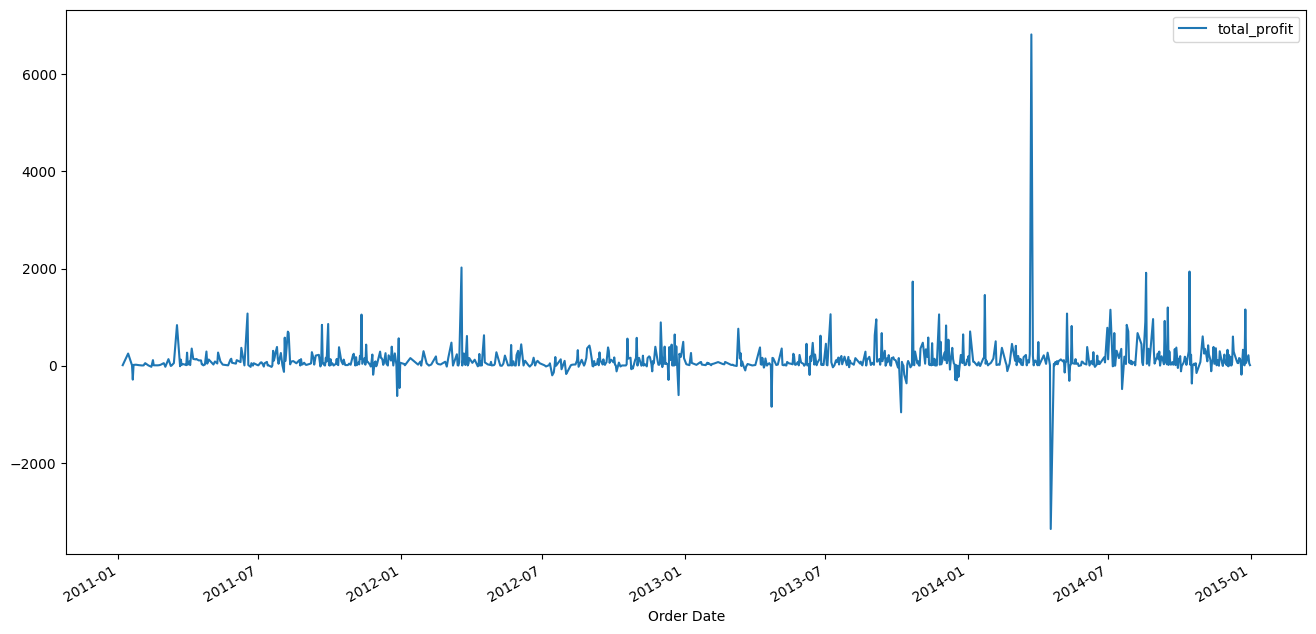

In [4]:

df.groupby('Order Date').agg(total_profit = ('Profit', 'sum')) \
    .reset_index() \
    .plot(kind='line', x='Order Date', y = 'total_profit', figsize = (16,8))


# Less Granular

In [5]:
df_less_granular = df.resample('1Y', on = 'Order Date')['Profit'].sum()
df_less_granular
# No more "day/month" level data
# Cannot drill down anymore

/tmp/ipykernel_44138/2805178247.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_less_granular = df.resample('1Y', on = 'Order Date')['Profit'].sum()


Order Date
2011-12-31    20065.6912
2012-12-31    20492.1947
2013-12-31    23959.9374
2014-12-31    43900.6256
Freq: YE-DEC, Name: Profit, dtype: float64

<Axes: xlabel='Order Date'>

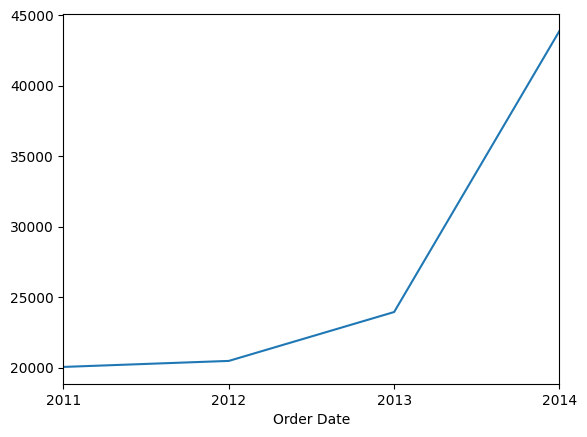

In [7]:
df_less_granular.plot.line()

In [8]:
df_monthly_sales = df.resample('1M', on = 'Order Date')['Profit'].sum()
df_monthly_sales
# No more "day/month" level data
# Cannot drill down anymore

/tmp/ipykernel_44138/1914007452.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly_sales = df.resample('1M', on = 'Order Date')['Profit'].sum()


Order Date
2011-01-31      20.9733
2011-02-28     228.8282
2011-03-31    1534.2273
2011-04-30    1629.4545
2011-05-31     873.5640
2011-06-30    1771.8152
2011-07-31    1946.6828
2011-08-31    2560.9044
2011-09-30    3075.5227
2011-10-31    1391.2655
2011-11-30    3151.3107
2011-12-31    1881.1426
2012-01-31     600.3079
2012-02-29     434.1332
2012-03-31    4243.4035
2012-04-30    1332.7957
2012-05-31    1641.1504
2012-06-30    1034.3461
2012-07-31      24.2496
2012-08-31    1238.9703
2012-09-30    2451.2176
2012-10-31    1778.4475
2012-11-30    1750.1860
2012-12-31    3962.9869
2013-01-31     644.2454
2013-02-28     388.3981
2013-03-31    1210.2185
2013-04-30     334.3805
2013-05-31    1506.6791
2013-06-30    2275.4563
2013-07-31    2978.7087
2013-08-31    1249.6678
2013-09-30    4276.4042
2013-10-31    1065.1384
2013-11-30    4795.0301
2013-12-31    3235.6103
2014-01-31    3300.0024
2014-02-28    1648.2299
2014-03-31    9107.0263
2014-04-30   -1867.7502
2014-05-31    2779.0547
2014-

<Axes: xlabel='Order Date'>

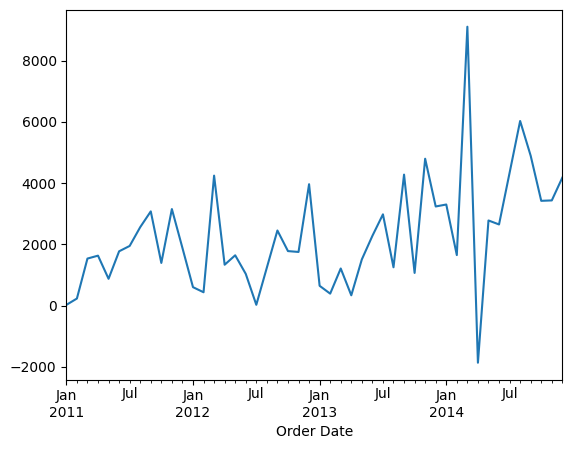

In [9]:
df_monthly_sales.plot.line()